Regression Summary - Average Violent Crime Rates vs Cost of Living Index:
                             OLS Regression Results                             
Dep. Variable:     Cost of Living Index   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                 -0.034
Method:                   Least Squares   F-statistic:                 8.453e-05
Date:                  Tue, 23 Jan 2024   Prob (F-statistic):              0.993
Time:                          10:01:26   Log-Likelihood:                -113.67
No. Observations:                    31   AIC:                             231.3
Df Residuals:                        29   BIC:                             234.2
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

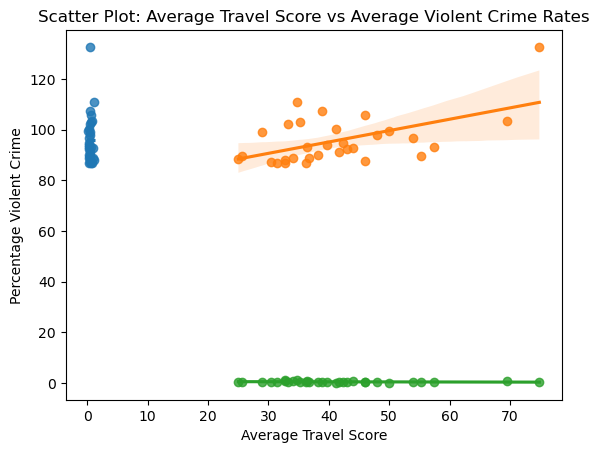

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the DataFrames
city_summary_df = pd.read_csv("/users/spicysara/Perfect-Place/Resources_Analysis/city_summary_df.csv")
crime_rates_df = pd.read_csv("/users/spicysara/Perfect-Place/Resources_Analysis/crime_rates_df.csv")
average_travel_score_df = pd.read_csv("/users/spicysara/Perfect-Place/Resources_Analysis/average_travel_score.csv")

# Replace missing values with the mean of the column
city_summary_df['Cost of Living Index'].fillna(city_summary_df['Cost of Living Index'].mean(), inplace=True)
crime_rates_df['Percentage Violent Crime'].fillna(crime_rates_df['Percentage Violent Crime'].mean(), inplace=True)
average_travel_score_df['Average Travel Score'].fillna(average_travel_score_df['Average Travel Score'].mean(), inplace=True)

# Merge the DataFrames
merged_df = pd.merge(city_summary_df, crime_rates_df, on=['State', 'City'])
merged_df = pd.merge(merged_df, average_travel_score_df, on=['State', 'City'])

# Scatter plot with regression line for Average violent crime rates vs Cost of Living Index
sns.regplot(x='Percentage Violent Crime', y='Cost of Living Index', data=merged_df)
plt.title('Scatter Plot: Average Violent Crime Rates vs Cost of Living Index')
plt.xlabel('Average Violent Crime Rates')
plt.ylabel('Cost of Living Index')

# Perform linear regression
model1 = sm.OLS(merged_df['Cost of Living Index'], sm.add_constant(merged_df['Percentage Violent Crime'])).fit()

# Display regression summary
print("Regression Summary - Average Violent Crime Rates vs Cost of Living Index:")
print(model1.summary())
print("\n")

# Scatter plot with regression line for Average Travel Score vs Cost of Living Index
sns.regplot(x='Average Travel Score', y='Cost of Living Index', data=merged_df)
plt.title('Scatter Plot: Average Travel Score vs Cost of Living Index')
plt.xlabel('Average Travel Score')
plt.ylabel('Cost of Living Index')

# Perform linear regression
model2 = sm.OLS(merged_df['Cost of Living Index'], sm.add_constant(merged_df['Average Travel Score'])).fit()

# Display regression summary
print("Regression Summary - Average Travel Score vs Cost of Living Index:")
print(model2.summary())
print("\n")

# Scatter plot with regression line for Average Travel Score vs Average violent crime rates
sns.regplot(x='Average Travel Score', y='Percentage Violent Crime', data=merged_df)
plt.title('Scatter Plot: Average Travel Score vs Average Violent Crime Rates')
plt.xlabel('Average Travel Score')
plt.ylabel('Percentage Violent Crime')

# Perform linear regression
model3 = sm.OLS(merged_df['Percentage Violent Crime'], sm.add_constant(merged_df['Average Travel Score'])).fit()

# Display regression summary
print("Regression Summary - Average Travel Score vs Percentage Violent Crime:")
print(model3.summary())
print("\n")

# Show all plots
plt.show()


File '/users/spicysara/Perfect-Place/Resources_Analysis/city_summary_df.csv' exists.
File '/users/spicysara/Perfect-Place/Resources_Analysis/crime_rates_df.csv' exists.
File '/users/spicysara/Perfect-Place/Resources_Analysis/walk_bike_transit_df.csv' does not exist.
